Plot the locations of the profiles for the different regions. 

In [45]:
import os
import glob
import netCDF4
import logging
import calendar
import numpy as np
import emodnetchemistry
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import warnings
import matplotlib.cbook
plt.rcParams.update({'font.size': 16})
plt.rc('figure', facecolor='w')
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
from importlib import reload
reload(emodnetchemistry)

<module 'emodnetchemistry' from '/home/ctroupin/Projects/EMODnet/Chemistry3/EMODnet-Chemistry/python/emodnetchemistry.py'>

In [40]:
logger = logging.getLogger("EMODnet-Chemistry-Data-positions")
logger.setLevel(logging.DEBUG)
logging.info("Starting")

## Paths

In [41]:
datadir = "/data/EMODnet/Eutrophication/Split/"
figdir = "/home/ctroupin/dox/EMODnet-Chemistry/Data-locations/"
if not os.path.exists(figdir):
    os.makedirs(figdir)

varlist = ["phosphate", "silicate", "ammonium", "chlorophyll-a", 
           "dissolved_inorganic_nitrogen", "dissolved_oxygen"]

### Domains
Taken from another work, coordinates should be adapted.

In [42]:
arctic = emodnetchemistry.Region(-44.25, 70.0, 56.5, 83.0, 0.25, 0.125, "Arctic Sea")
neatlantic = emodnetchemistry.Region(-42.0, -0.1, 24.9, 48.0, 0.1, 0.1, "North-East Atlantic Ocean")
balticsea = emodnetchemistry.Region(9.4, 30.9, 53.0, 65.9, 0.1, 0.1, "Baltic Sea")
blacksea = emodnetchemistry.Region(26.5, 41.95, 40.0, 47.95, 0.05, 0.05, "Black Sea")
mediterranean = emodnetchemistry.Region(-7.0, 36.375, 30.0, 45.875, 0.125, 0.125, "Mediterranean Sea")
northsea = emodnetchemistry.Region(-5.4, 13.0, 47.9, 62.0, 0.1, 0.1, "North Sea")
regionlist = [arctic, blacksea, balticsea, mediterranean, neatlantic, northsea]

In [43]:
regiondict = {"ArcticSea": arctic, "Atlantic": neatlantic, "BalticSea": balticsea, 
              "BlackSea": blacksea, "MedSea2": mediterranean, "NorthSea": northsea}

## Make plot
Define projection

In [8]:
m = Basemap(projection='ortho', lon_0=5., lat_0=50, resolution='i')

## Loop on variables

In [33]:
for varname in varlist[0:1]:
    logger.info("Working on variable {}".format(varname))
    
    figname = os.path.join(figdir, f"EMODnet_data_domains_{varname}.png")
    logger.info("Saving figure as {}".format(figname))
    emodnetchemistry.plot_data_locations(m, varname, regiondict, figname)
    
    figname = os.path.join(figdir, f"EMODnet_hexbin_{varname}.png")
    logger.info("Saving figure as {}".format(figname))
    emodnetchemistry.plot_hexbin_datalocations(m, varname, regiondict, figname)

INFO:EMODnet-Chemistry-Data-positions:Working on variable phosphate
INFO:EMODnet-Chemistry-Data-positions:Saving figure as /home/ctroupin/dox/EMODnet-Chemistry/Data-locations/EMODnet_data_domains2_phosphate.png
INFO:EMODnet-Chemistry-Data-positions:Working on 9 files
INFO:EMODnet-Chemistry-Data-positions:Saving figure as /home/ctroupin/dox/EMODnet-Chemistry/Data-locations/EMODnet_hexbin_phosphate.png


TypeError: plot_hexbin_datalocations() takes from 2 to 3 positional arguments but 4 were given

### Month by month

In [46]:
domain = [-45., 70., 24., 83.]
m = Basemap(projection='merc', llcrnrlon=domain[0], llcrnrlat=domain[2],
            urcrnrlon=domain[1], urcrnrlat=domain[3],
            lat_ts=0.5 * (domain[2] + domain[3]), resolution='i')

In [47]:
for varname in varlist[0:1]:
    datafilelist = sorted(glob.glob(os.path.join(datadir, f"*{varname}*.nc")))
    lonall, latall, datesall = emodnetchemistry.read_all_positions(m, datafilelist)
    years = [dd.year for dd in datesall]
    months = [dd.month for dd in datesall]

In [50]:
months = np.array(months)
years = np.array(years)
fig = plt.figure(figsize=(8, 12))
for mm in range(1, 13):
    mmm = str(mm).zfill(2)
    logger.info("Working on month {}".format(calendar.month_name[mm]))
    timeselector = np.where(months == mm)[0]
    logger.info("Found {} data points".format(len(timeselector)))
    
    ax = plt.subplot(4, 3, mm)
    plt.title(calendar.month_name[mm])
    m.plot(lonall[timeselector], latall[timeselector], "ko", ms=.2)
    m.fillcontinents(color=".85", zorder=3)
    m.drawcoastlines(linewidth=0.1, zorder=4)

plt.savefig(os.path.join(figdir, f"data_{varname}_month_{mmm}_2"), 
            dpi=300, bbox_inches="tight", facecolor="w",
                    transparent=False)
plt.close()
fig.clf()

INFO:EMODnet-Chemistry-Data-positions:Working on month January
INFO:EMODnet-Chemistry-Data-positions:Found 179855 data points
INFO:EMODnet-Chemistry-Data-positions:Working on month February
INFO:EMODnet-Chemistry-Data-positions:Found 158746 data points
INFO:EMODnet-Chemistry-Data-positions:Working on month March
INFO:EMODnet-Chemistry-Data-positions:Found 171740 data points
INFO:EMODnet-Chemistry-Data-positions:Working on month April
INFO:EMODnet-Chemistry-Data-positions:Found 236651 data points
INFO:EMODnet-Chemistry-Data-positions:Working on month May
INFO:EMODnet-Chemistry-Data-positions:Found 240042 data points
INFO:EMODnet-Chemistry-Data-positions:Working on month June
INFO:EMODnet-Chemistry-Data-positions:Found 250652 data points
INFO:EMODnet-Chemistry-Data-positions:Working on month July
INFO:EMODnet-Chemistry-Data-positions:Found 205917 data points
INFO:EMODnet-Chemistry-Data-positions:Working on month August
INFO:EMODnet-Chemistry-Data-positions:Found 234623 data points
INFO:E

## Specific plot for the Arctic Sea

In [14]:
varname = varlist[-1]
datafilelist = sorted(glob.glob(os.path.join(datadir, f"*{varname}*.nc")))
datafile = datafilelist[0]
logger.info("Working on file {}".format(datafile))

INFO:EMODnet-Chemistry-Data-positions:Working on file /data/EMODnet/Eutrophication/Split/ArcticSea_Water_body_dissolved_oxygen_concentration.nc


In [29]:
with netCDF4.Dataset(datafile) as nc:
    obslon = nc.variables["obslon"][:]
    obslon[obslon > 180] -= 360.
    obslat = nc.variables["obslat"][:]
    obsdepth = nc.variables["obsdepth"][:]
    obstime = nc.variables["obstime"][:]
    fieldname = list( nc.variables.keys())[-1]
    obsval = nc.variables[fieldname][:]

In [35]:
gooddepth = np.where(obsdepth < 2)[0]

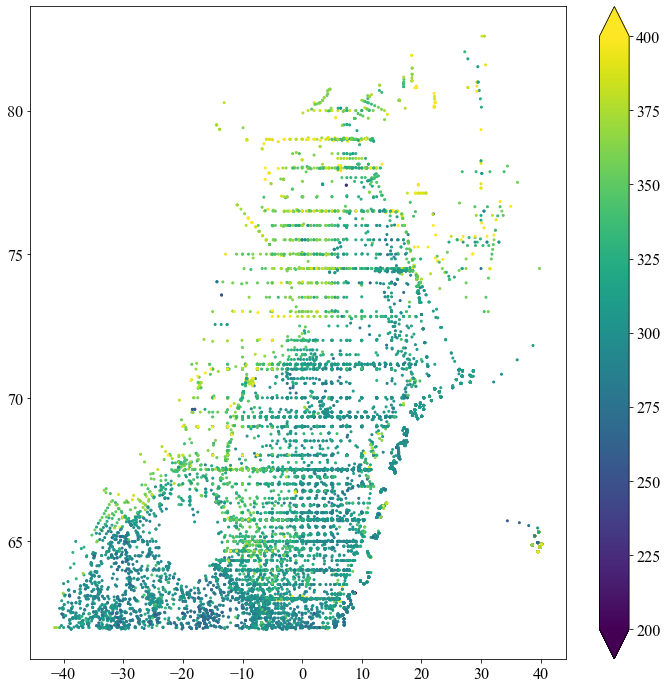

In [38]:
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111)
plt.scatter(obslon[gooddepth], obslat[gooddepth], s=4, c=obsval[gooddepth], vmin=200., vmax=400.)
plt.colorbar(extend="both")
plt.show()
plt.close()